# TA-05: Implementasi Decision Tree - Mushroom Classification

**Dataset**: Mushroom Classification (Edible vs Poisonous)

**Tujuan**: Implementasi, evaluasi, dan deployment Decision Tree classifier

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import joblib

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


## 1. Load Data & EDA

In [2]:
df = pd.read_csv('mushrooms.csv')
print('Dataset shape:', df.shape)
display(df.head())
print('\n', df.info())

Dataset shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

=== Target Distribution ===
class
e    4208
p    3916
Name: count, dtype: int64

Percentage:
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


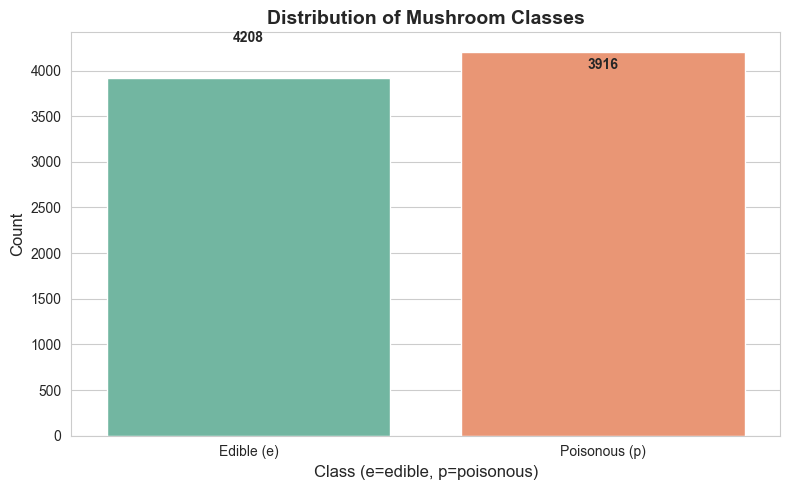

 Screenshot untuk laporan


In [3]:
print('=== Target Distribution ===')
print(df['class'].value_counts())
print('\nPercentage:')
print(df['class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Distribution of Mushroom Classes', fontsize=14, fontweight='bold')
plt.xlabel('Class (e=edible, p=poisonous)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Edible (e)', 'Poisonous (p)'])
for i, v in enumerate(df['class'].value_counts().values):
    plt.text(i, v + 100, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()
print(' Screenshot untuk laporan')

## 2. Preprocessing

In [4]:
X = df.drop(columns=['class'])
y = df['class']
X_encoded = pd.get_dummies(X, drop_first=False)
print(f'Original features: {X.shape[1]}, After encoding: {X_encoded.shape[1]}')

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=42, stratify=y
)
print(f'Training: {X_train.shape}, Testing: {X_test.shape}')

Original features: 22, After encoding: 117
Training: (6093, 117), Testing: (2031, 117)


## 3. Baseline Model

In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('=== BASELINE MODEL ===')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Tree depth: {clf.get_depth()}')
print(f'Number of leaves: {clf.get_n_leaves()}')
print('\n', classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

=== BASELINE MODEL ===
Accuracy: 1.0000
Tree depth: 7
Number of leaves: 14

               precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1052
   Poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## 4. Visualisasi

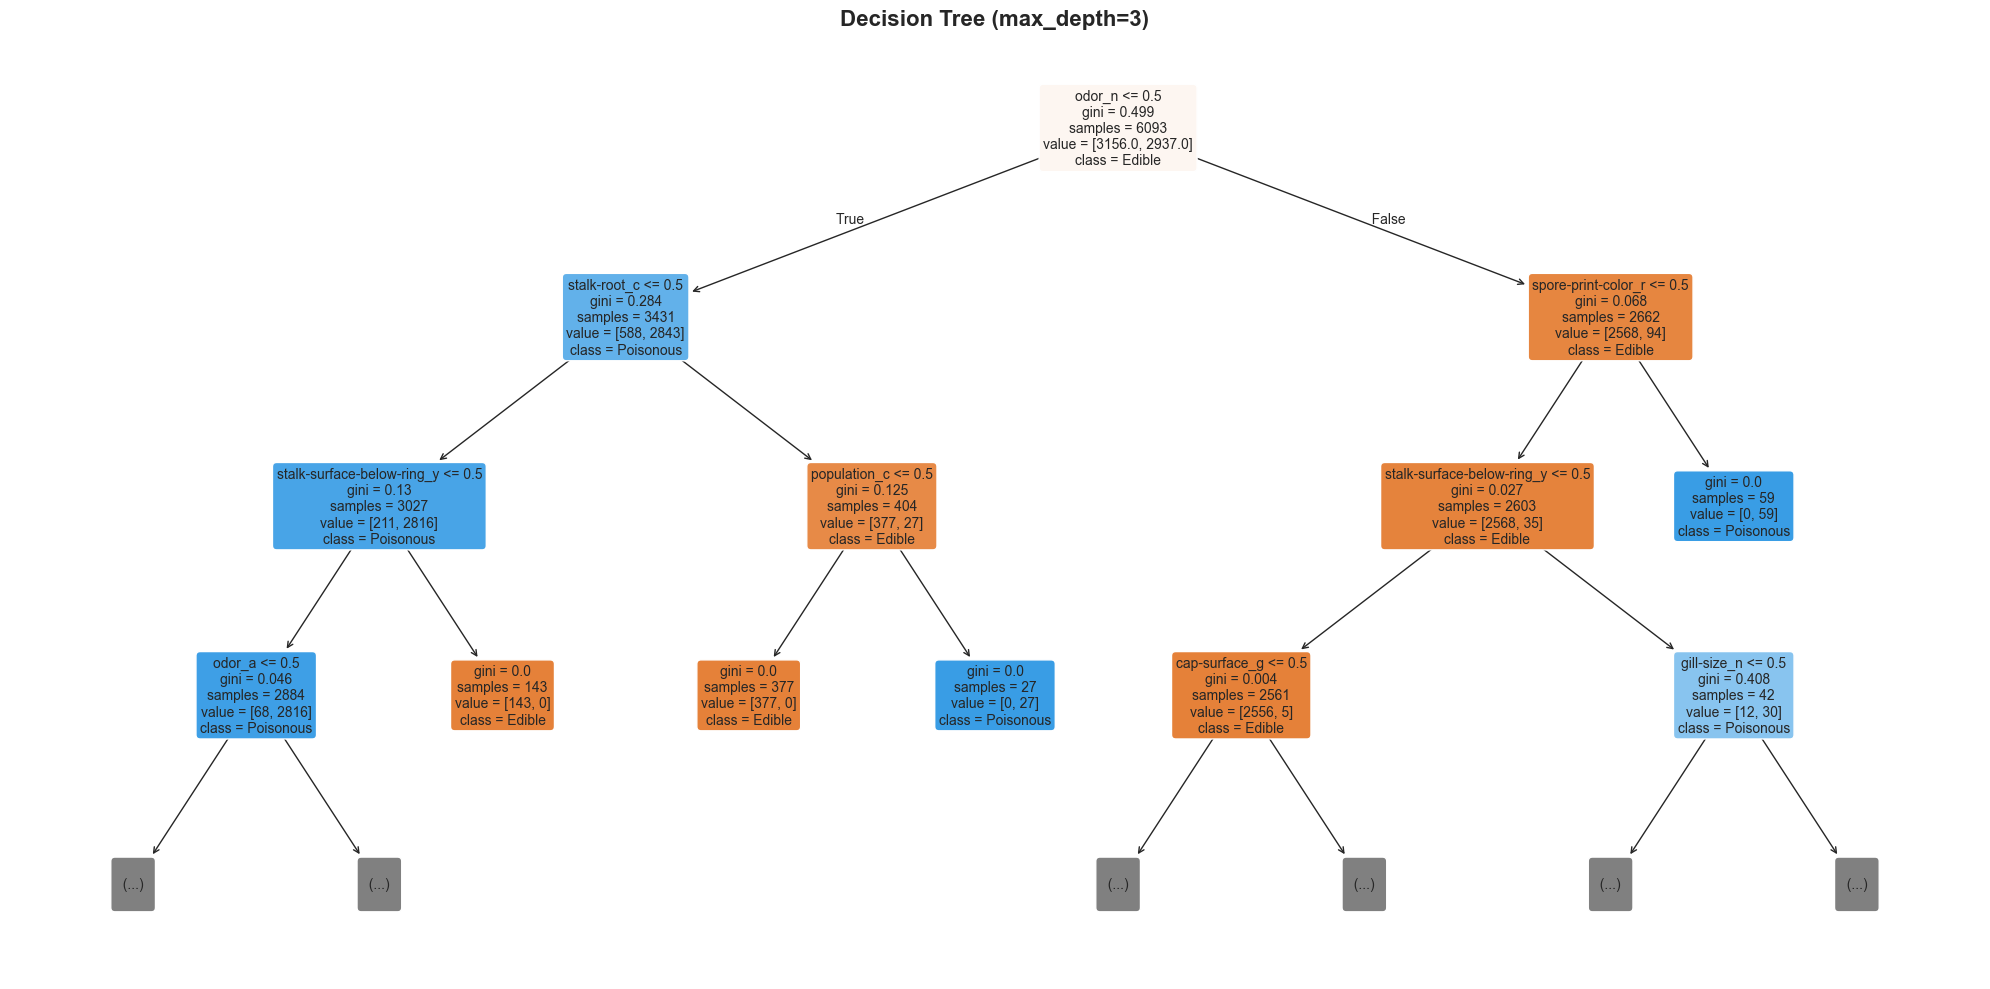

 Screenshot untuk laporan


In [6]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, max_depth=3, feature_names=X_encoded.columns, 
               class_names=['Edible', 'Poisonous'], filled=True, fontsize=10, rounded=True)
plt.title('Decision Tree (max_depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
print(' Screenshot untuk laporan')

=== Top 20 Features ===
odor_n                        0.620116
stalk-root_c                  0.174683
stalk-surface-below-ring_y    0.099168
spore-print-color_r           0.036911
odor_a                        0.022204
odor_l                        0.021441
population_c                  0.016562
gill-size_n                   0.005634
cap-surface_g                 0.001967
cap-shape_c                   0.000657
bruises_f                     0.000653
gill-size_b                   0.000004
cap-surface_f                 0.000000
cap-color_e                   0.000000
cap-color_g                   0.000000
cap-color_p                   0.000000
cap-shape_x                   0.000000
cap-shape_s                   0.000000
cap-shape_k                   0.000000
cap-color_c                   0.000000
dtype: float64


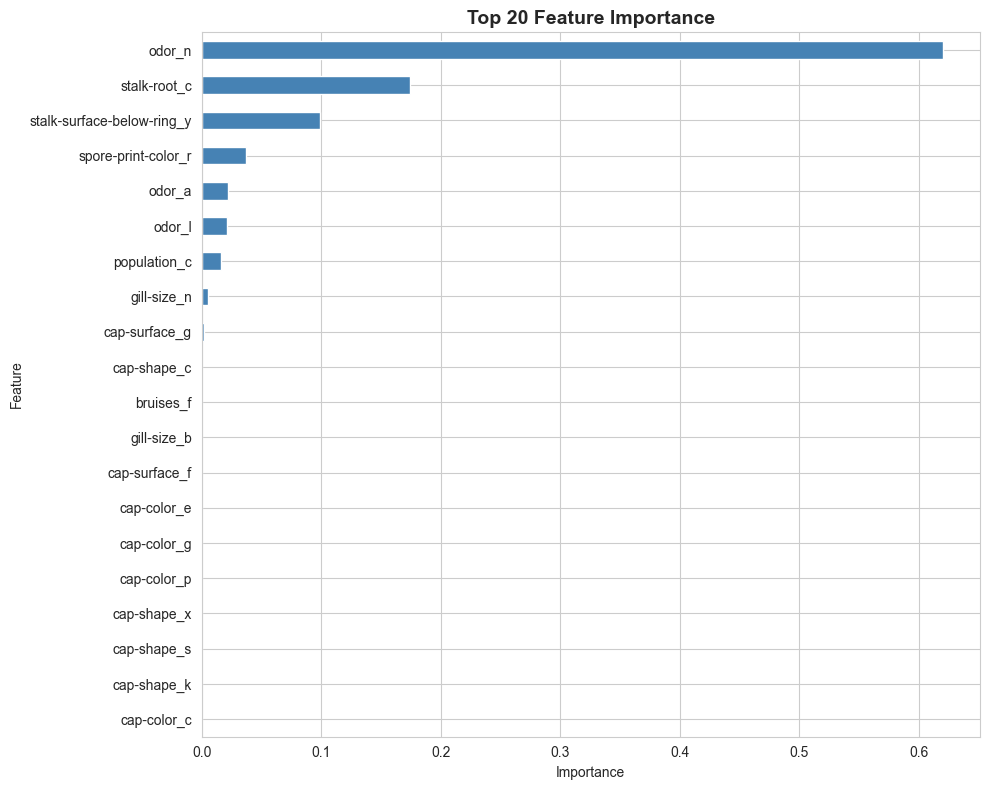

 Screenshot untuk laporan


In [7]:
fi = pd.Series(clf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print('=== Top 20 Features ===')
print(fi.head(20))

plt.figure(figsize=(10, 8))
fi.head(20).plot(kind='barh', color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print(' Screenshot untuk laporan')

## 5. Evaluasi

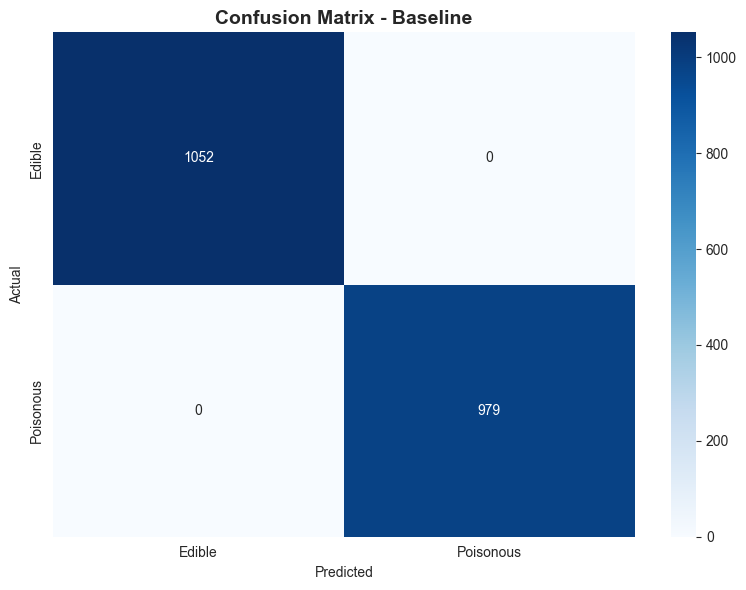

 Screenshot untuk laporan


In [8]:
cm = confusion_matrix(y_test, y_pred, labels=['e', 'p'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Baseline', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print(' Screenshot untuk laporan')

In [9]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_encoded, y, cv=cv, scoring='accuracy')
print('=== 5-Fold Cross-Validation ===')
print(f'Scores: {scores}')
print(f'Mean: {scores.mean():.4f}, Std: {scores.std():.4f}')

=== 5-Fold Cross-Validation ===
Scores: [1. 1. 1. 1. 1.]
Mean: 1.0000, Std: 0.0000


## 6. Hyperparameter Tuning

In [10]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, 
                   cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print('\n=== GridSearchCV Results ===')
print(f'Best params: {grid.best_params_}')
print(f'Best CV score: {grid.best_score_:.4f}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits

=== GridSearchCV Results ===
Best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.9998


In [11]:
best_clf = grid.best_estimator_
y_pred_best = best_clf.predict(X_test)

print('=== TUNED MODEL ===')
print(f'Accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
print(f'Tree depth: {best_clf.get_depth()}')
print(f'Number of leaves: {best_clf.get_n_leaves()}')
print('\n', classification_report(y_test, y_pred_best, target_names=['Edible', 'Poisonous']))

print('\n=== Comparison ===')
print(f'Baseline: {accuracy_score(y_test, y_pred):.4f}')
print(f'Tuned:    {accuracy_score(y_test, y_pred_best):.4f}')
print(f'Improvement: {accuracy_score(y_test, y_pred_best) - accuracy_score(y_test, y_pred):.4f}')

=== TUNED MODEL ===
Accuracy: 1.0000
Tree depth: 7
Number of leaves: 14

               precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1052
   Poisonous       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


=== Comparison ===
Baseline: 1.0000
Tuned:    1.0000
Improvement: 0.0000


## 7. Cost-Complexity Pruning (Optional)

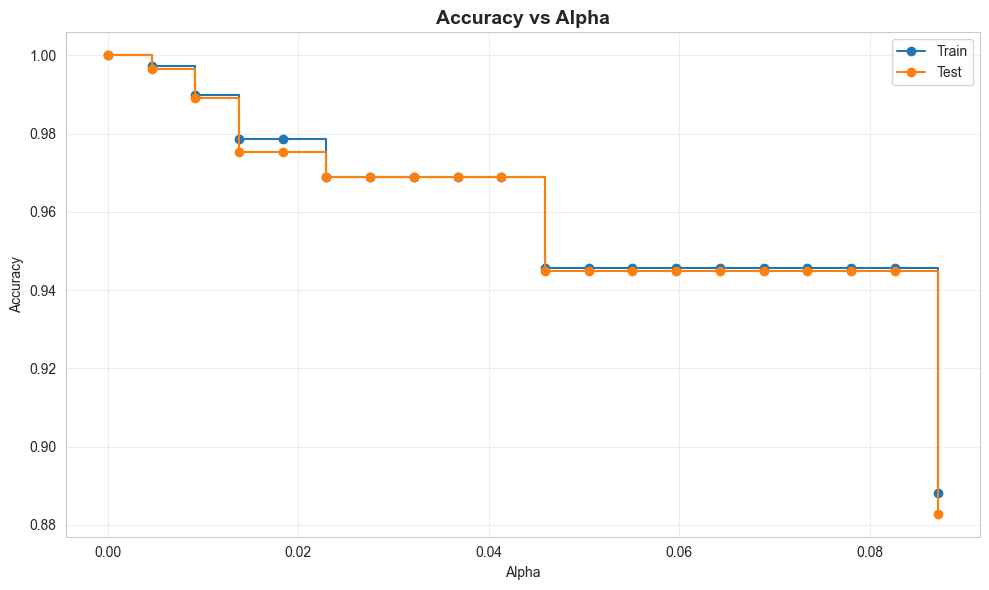

Best alpha: 0.000000
Test accuracy: 1.0000


In [12]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
alpha_sample = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 20)

clfs_pruned = []
for ccp_alpha in alpha_sample:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    clfs_pruned.append(dt)

train_scores = [dt.score(X_train, y_train) for dt in clfs_pruned]
test_scores = [dt.score(X_test, y_test) for dt in clfs_pruned]

plt.figure(figsize=(10, 6))
plt.plot(alpha_sample, train_scores, marker='o', label='Train', drawstyle='steps-post')
plt.plot(alpha_sample, test_scores, marker='o', label='Test', drawstyle='steps-post')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_alpha_idx = np.argmax(test_scores)
print(f'Best alpha: {alpha_sample[best_alpha_idx]:.6f}')
print(f'Test accuracy: {test_scores[best_alpha_idx]:.4f}')

## 8. Final Results

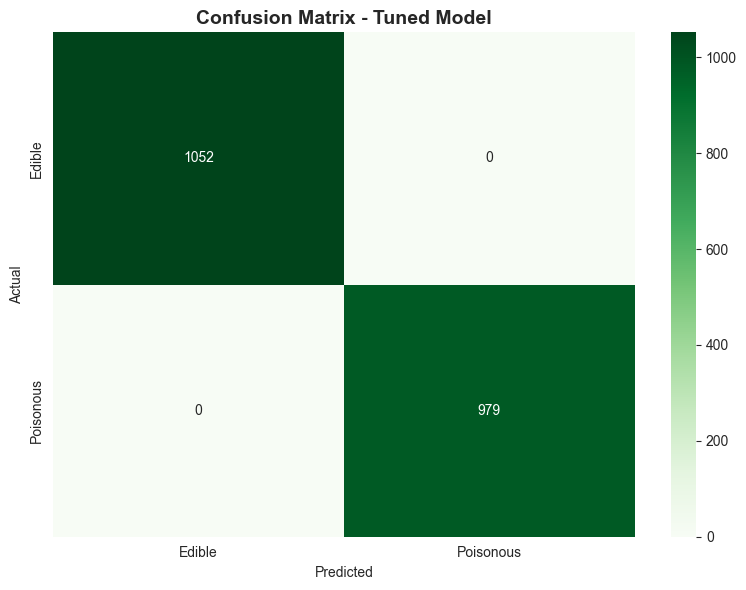

 Screenshot untuk laporan


In [13]:
cm_best = confusion_matrix(y_test, y_pred_best, labels=['e', 'p'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print(' Screenshot untuk laporan')

=== Top 15 Features (Tuned) ===
odor_n                        0.620116
stalk-root_c                  0.174683
stalk-surface-below-ring_y    0.099168
spore-print-color_r           0.036911
odor_a                        0.022204
odor_l                        0.021441
population_c                  0.016562
gill-size_n                   0.005634
cap-surface_g                 0.001967
cap-shape_c                   0.000657
bruises_f                     0.000653
gill-size_b                   0.000004
cap-surface_f                 0.000000
cap-color_e                   0.000000
cap-color_g                   0.000000
dtype: float64


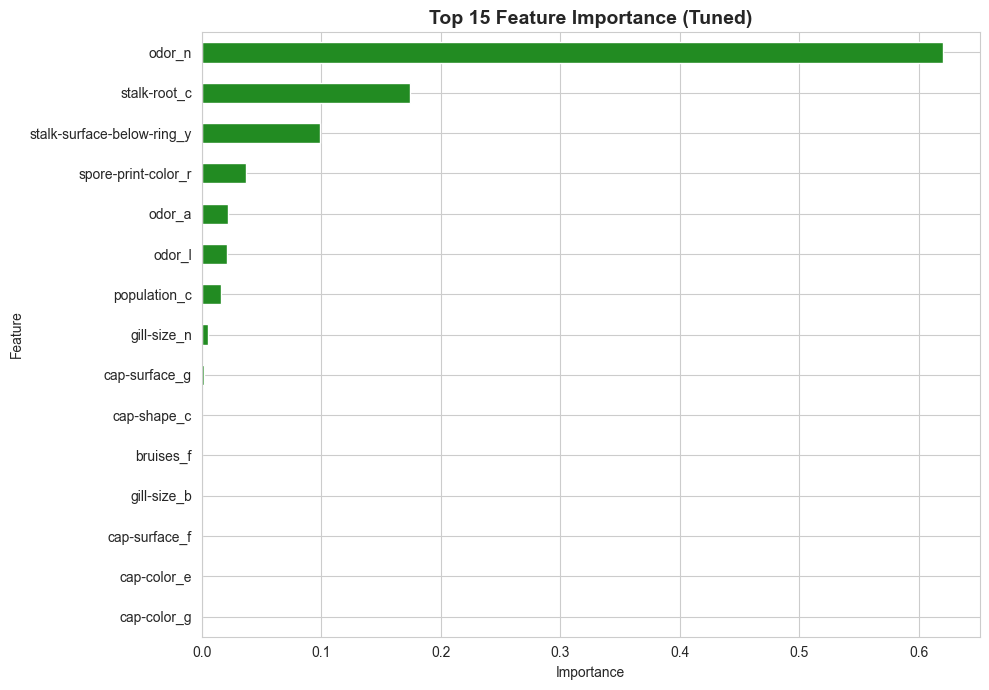

 Screenshot untuk laporan


In [14]:
fi_best = pd.Series(best_clf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print('=== Top 15 Features (Tuned) ===')
print(fi_best.head(15))

plt.figure(figsize=(10, 7))
fi_best.head(15).plot(kind='barh', color='forestgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance (Tuned)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
print(' Screenshot untuk laporan')

In [15]:
print('='*60)
print('FINAL MODEL SUMMARY')
print('='*60)
print('\n Configuration:')
print(f'  Best params: {grid.best_params_}')
print(f'  Tree depth: {best_clf.get_depth()}')
print(f'  Leaves: {best_clf.get_n_leaves()}')
print('\n Performance:')
print(f'  Training:  {best_clf.score(X_train, y_train):.4f}')
print(f'  Testing:   {best_clf.score(X_test, y_test):.4f}')
print(f'  CV Mean:   {grid.best_score_:.4f}')
print('\n Metrics (Poisonous):')
print(f'  Precision: {precision_score(y_test, y_pred_best, pos_label="p"):.4f}')
print(f'  Recall:    {recall_score(y_test, y_pred_best, pos_label="p"):.4f}')
print(f'  F1:        {f1_score(y_test, y_pred_best, pos_label="p"):.4f}')
print('\n Top feature:', fi_best.index[0])
print('='*60)

FINAL MODEL SUMMARY

 Configuration:
  Best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Tree depth: 7
  Leaves: 14

 Performance:
  Training:  1.0000
  Testing:   1.0000
  CV Mean:   0.9998

 Metrics (Poisonous):
  Precision: 1.0000
  Recall:    1.0000
  F1:        1.0000

 Top feature: odor_n


# 9. Save Model

In [16]:
model_filename = 'decision_tree_mushroom.pkl'
joblib.dump(best_clf, model_filename)
print(f'✓ Model saved as {model_filename}')
print(f'  Size: {os.path.getsize(model_filename) / 1024:.2f} KB')

# Test load
loaded_model = joblib.load(model_filename)
print(f'✓ Model loaded, accuracy: {loaded_model.score(X_test, y_test):.4f}')

✓ Model saved as decision_tree_mushroom.pkl
  Size: 5.74 KB
✓ Model loaded, accuracy: 1.0000


In [17]:
# Generate feature_names.txt untuk deployment
with open('feature_names.txt', 'w') as f:
    for col in X_encoded.columns:
        f.write(f"{col}\n")

print(f'✓ feature_names.txt created with {len(X_encoded.columns)} features')
print(f'  File size: {os.path.getsize("feature_names.txt")} bytes')

# Verify
with open('feature_names.txt', 'r') as f:
    features = f.readlines()
print(f'\nFirst 10 features:')
for i, feat in enumerate(features[:10], 1):
    print(f'  {i}. {feat.strip()}')

✓ feature_names.txt created with 117 features
  File size: 1947 bytes

First 10 features:
  1. cap-shape_b
  2. cap-shape_c
  3. cap-shape_f
  4. cap-shape_k
  5. cap-shape_s
  6. cap-shape_x
  7. cap-surface_f
  8. cap-surface_g
  9. cap-surface_s
  10. cap-surface_y
